<a href="https://colab.research.google.com/github/OlegSoluyanov/mytrainingprojects/blob/main/Yandex_afisha_product_%26_marketing_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Маркетинговая аналитика сервиса Яндекс.Афиша

<br>**ОПИСАНИЕ ПРОЕКТА:
<br>помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет**

<br>***Вопросы для анализа:***
<br>как клиенты пользуются сервисом,
<br>когда делают первые покупки на сайте,
<br>сколько денег приносит компании каждый клиент,
<br>когда расходы на привлечение клиента окупаются.

<br>**ОПИСАНИЕ ДАННЫХ**

<br>***Структура visits_log.csv***
<br>*Uid* — уникальный идентификатор пользователя,
<br>*Device* — категория устройства пользователя,
<br>*Start Ts* — дата и время начала сессии,
<br>*End Ts* — дата и время окончания сессии,
<br>*Source Id* — идентификатор источника перехода на сайт.

<br>***Структура orders_log.csv***
<br>*Uid* — уникальный идентификатор пользователя,
<br>*Buy Ts* — дата и время заказа,
<br>*Revenue* — сумма заказа.

<br>***Структура costs.csv***
<br>*source_id* — идентификатор рекламного источника,
<br>*dt* — дата проведения рекламной кампании,
<br>*costs* — расходы на эту кампанию.

## Загрузка данных и подготовка к анализу

### Загрузка и просмотр данных

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import seaborn as sns ; sns.set()
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import datetime as dt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Чтение файлаов
visits = pd.read_csv('visits_log.csv')
orders = pd.read_csv('orders_log.csv')
costs = pd.read_csv('costs.csv')

In [ ]:
# Функция просмотра датасетов
def datalook (dataset):
    display(dataset.info())
    display(dataset.head())
    display(dataset.describe())
    display(dataset.describe(include=[object]))
    print('Количество полных дубликатов:', dataset.duplicated().sum())
    return

In [ ]:
datalook(visits) # Просмотр данных по визитам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

Source Id           Uid
count  359400.000000  3.594000e+05
mean        3.750515  9.202557e+18
std         1.917116  5.298433e+18
min         1.000000  1.186350e+13
25%         3.000000  4.613407e+18
50%         4.000000  9.227413e+18
75%         5.000000  1.372824e+19
max        10.000000  1.844668e+19

Device               End Ts             Start Ts
count    359400               359400               359400
unique        2               224760               224303
top     desktop  2017-11-24 16:51:00  2017-11-24 16:06:00
freq     262567                   23                   19

Количество полных дубликатов: 0


**Пропусков нет, столбцы End Ts и Start Ts, содержащие дату и время, необходимо привести к формату datetime, наименования столбцов - к нижнему регистру и убрать пробелы**

In [ ]:
datalook(orders) # Просмотр данных по заказам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

Revenue           Uid
count  50415.000000  5.041500e+04
mean       4.999647  9.098161e+18
std       21.818359  5.285742e+18
min        0.000000  3.135781e+14
25%        1.220000  4.533567e+18
50%        2.500000  9.102274e+18
75%        4.890000  1.368290e+19
max     2633.280000  1.844617e+19

Buy Ts
count                 50415
unique                45991
top     2018-05-31 10:13:00
freq                      9

Количество полных дубликатов: 0


**Пропусков нет, столбц Buy Ts, содержащий дату и время, необходимо привести к формату datetime, наименования столбцов - к нижнему регистру и убрать пробелы**

In [ ]:
datalook(costs) # Просмотр данных по расходам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08

source_id        costs
count  2542.000000  2542.000000
mean      4.857199   129.477427
std       3.181581   156.296628
min       1.000000     0.540000
25%       2.000000    21.945000
50%       4.000000    77.295000
75%       9.000000   170.065000
max      10.000000  1788.280000

dt
count         2542
unique         364
top     2018-02-26
freq             7

Количество полных дубликатов: 0


**Пропусков нет, столбц dt, содержащий дату необходимо привести к формату datetime**

### Подготовка данных

In [ ]:
# Функция исправления столбцов
def columns_normalization(data):
    data.columns = data.columns.str.replace(' ', '_').str.lower()
    return display(data.sample(5))

In [ ]:
columns_normalization(visits) # нормализация таблицы с визитами

device               end_ts  source_id             start_ts  \
327360    touch  2017-09-29 13:23:00         10  2017-09-29 13:22:00   
336578  desktop  2017-06-15 17:08:00          4  2017-06-15 17:07:00   
354667    touch  2018-05-30 08:32:00          3  2018-05-30 08:24:00   
37531   desktop  2018-05-07 12:16:00          1  2018-05-07 11:50:00   
13989   desktop  2018-04-26 15:21:00         10  2018-04-26 15:00:00   

                         uid  
327360   8822091275754229331  
336578   6174328179050588198  
354667   8160383541659392201  
37531    9533547628018947221  
13989   11247017407798716602

In [ ]:
columns_normalization(orders) # нормализация таблицы с заказами

buy_ts  revenue                   uid
49134  2018-05-27 10:10:00     0.24   7427793048412047107
12837  2017-10-15 08:38:00     3.05  16113422499635515995
37527  2018-03-01 13:03:00    11.00  17605554290250452296
19789  2017-11-24 22:00:00     7.33  13932146660166623229
23609  2017-12-12 16:00:00     7.33   1234026521519948588

In [ ]:
columns_normalization(costs) # нормализация таблицы с расходами

source_id          dt   costs
1099          4  2017-06-11   71.66
1652          5  2017-12-18  157.60
538           2  2017-11-23  161.19
2375         10  2017-12-14   45.10
1213          4  2017-10-03  119.74

In [ ]:
# Приведение столбцов содержащих дату и время к формату datetime
visits[['end_ts', 'start_ts']] = visits[['end_ts', 'start_ts']].apply(pd.to_datetime)
visits['device'] = visits['device'].astype('category')
orders['buy_ts'] = orders['buy_ts'].apply(pd.to_datetime)
costs['dt'] = costs['dt'].apply(pd.to_datetime)

In [ ]:
# Распределение по виду девайса в %
visits['device'].value_counts('normalize')

desktop    0.73057
touch      0.26943
Name: device, dtype: float64

In [ ]:
# Начальная граница сессий за период
print('Время начала первой сессии за период',visits['start_ts'].max())

Время начала первой сессии за период 2018-05-31 23:59:00


In [ ]:
print('Время начала последней сессии за период',visits['start_ts'].max())

Время начала последней сессии за период 2018-05-31 23:59:00


In [ ]:
# Конечная граница сессий за период
print('Число сессий с окончанием за пределами периода',visits.query('end_ts > "2018-05-31 23:59:59"')['end_ts'].count())

Число сессий с окончанием за пределами периода 12


In [ ]:
# Заказы за перделами периода
print('Число заказов за пределами периода', orders.query('buy_ts > "2018-05-31 23:59:59"')['buy_ts'].count())

Число заказов за пределами периода 1


In [ ]:
# Число визитов по источникам
visits['source_id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source_id, dtype: int64

In [ ]:
# Проверка соответствия в источниках расходов
costs['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10])

<span style='color:blue'>Большинство визитов в десктопной версии 73%, 12 сессий заканчиваются позже 31 мая 2018 г, 1 заказ в таблице заказов - за пределами периода. Источники визитов №6 и №7 не финансировались.</span>

**Подготовлены данные для расчета метрик, нормализованы столбцы для удобства использования в коде, столбцы содержащие дату и время приведены в формат datetime**

## Расчет метрик и визуализация

### Продуктовые метрики

#### Vanity metrics DAU, WAU, MAU

In [ ]:
# Cоздание копии датасетов перед преобразованиями
visits_original = visits.copy()
orders_original = orders.copy()
costs_original = costs.copy()

In [ ]:
# Выделение дня, недели, года и даты в отдельный столбец
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_week']  = visits['start_ts'].astype('datetime64[W]')
visits['session_date'] = visits['start_ts'].astype('datetime64[D]')

In [ ]:
visits.sample(3)

device              end_ts  source_id            start_ts  \
354239  desktop 2017-10-22 10:13:00          4 2017-10-22 10:12:00   
270577  desktop 2017-11-17 00:05:00          3 2017-11-17 00:04:00   
281943  desktop 2017-08-11 15:58:00          4 2017-08-11 15:54:00   

                        uid session_month session_week session_date  
354239  9453825033344888090    2017-10-01   2017-10-19   2017-10-22  
270577  2670447920932548651    2017-11-01   2017-11-16   2017-11-17  
281943  8929263506273876512    2017-08-01   2017-08-10   2017-08-11

In [ ]:
# Расчет DAU WAU MAU
dau_visits = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_visits = (visits.groupby('session_week').agg({'uid': 'nunique'}).mean())
mau_visits = (visits.groupby('session_month').agg({'uid': 'nunique'}).mean())

In [ ]:
# Добавление значений в таблицу метрик
product_metrics = pd.DataFrame(
    {'metric' : [
        'Количество уникальных пользователей в день DAU', 
        'Количество уникальных пользователей в неделю WAU', 
        'Количество уникальных пользователей в месяц MAU'],
     'value' : [dau_visits[0], wau_visits[0], mau_visits[0]]})
product_metrics

metric         value
0    Количество уникальных пользователей в день DAU    907.991758
1  Количество уникальных пользователей в неделю WAU   5724.415094
2   Количество уникальных пользователей в месяц MAU  23228.416667

In [ ]:
# Группировка количества уникальных пользователей
visits_day = visits.groupby('session_date').agg({'uid': 'nunique'}).reset_index()
visits_week = visits.groupby('session_week').agg({'uid': 'nunique'}).reset_index()
visits_month = visits.groupby('session_month').agg({'uid': 'nunique'}).reset_index()

In [ ]:
visits['session_date'].min()

Timestamp('2017-06-01 00:00:00')

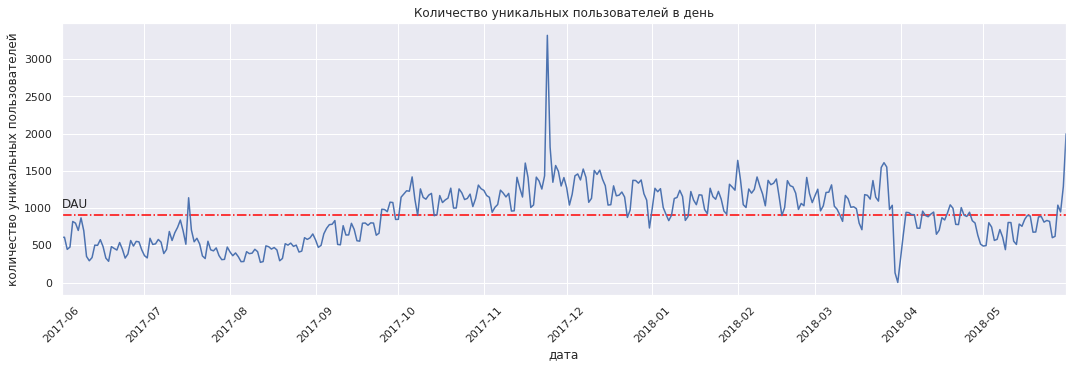

In [ ]:
# Визуализация количества уникальных визитов в день
fig, ax = plt.subplots(figsize=(18,5))
sns.lineplot(y='uid', x='session_date', data=visits_day)
xmin= visits['session_date'].min()
xmax= visits['session_date'].max()
w=dau_visits
ax.hlines(w, xmin, xmax, colors='C6', linestyles='dashdot', color=('red'))
ax.set_title('Количество уникальных пользователей в день')
ax.set_xlabel('дата')
ax.set_ylabel('количество уникальных пользователей')
ax.set_xlim(xmin, xmax)
ax.text(xmin, 1000, 'DAU')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

In [ ]:
minmax = visits.groupby('session_date').agg({'uid': 'nunique'})
minmax.sort_values('uid')

uid
session_date      
2018-03-31       1
2018-03-30     131
2017-08-12     271
2017-08-05     280
2017-08-13     281
...            ...
2018-03-26    1609
2018-02-01    1640
2017-11-25    1817
2018-05-31    1997
2017-11-24    3319

[364 rows x 1 columns]

**В первые четыре месяца с июня по конец сентября количество уникальных пользователей в день находилось ниже среднего за период, с локальным всплеском в середине июля. С октября 2017 по конец марта 2018 количество уникальных пользователей в день превышало средний уровень, 24 ноября 2017 был зафиксирован годовой максимум уникальных пользователей - 3319, достаточно резкий всплеск длинною в 1 день который говорит о каком-то неординарном событии. Также 31 марта 2018 года зафиксирован однодневный минимум в 1 визит, скорре всего не работал сайт. В последний день среза - 31 марта 2108 тоже всплеск уникальных визитов вдвое больше средндневного значения.**

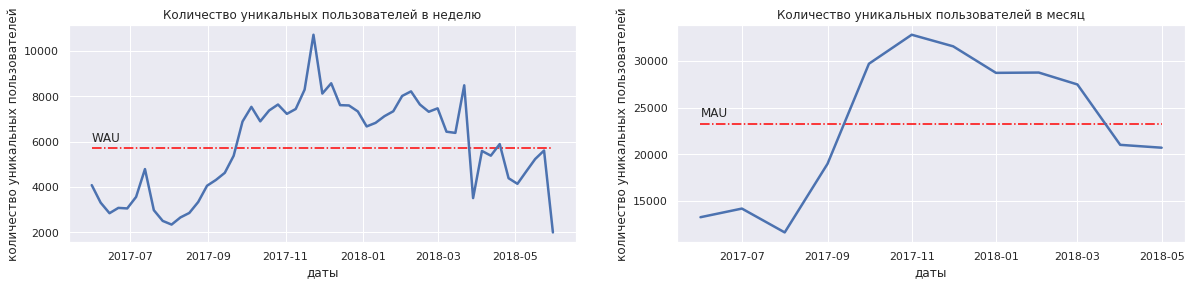

In [ ]:
# Визуализация уникальных количества визитов по неделям и месяцам
fig,axes = plt.subplots(1,2,figsize=(20,4))
sns.lineplot(y='uid', x='session_week', data=visits_week, ax=axes[0], linewidth=2.5)
xmin1= visits['session_week'].min()
xmax1= visits['session_week'].max()
y1=wau_visits
axes[0].hlines(y1, xmin1, xmax1, colors='C6', linestyles='dashdot', color=('red'))
axes[0].set_title('Количество уникальных пользователей в неделю')
axes[0].set_xlabel('даты')
axes[0].set_ylabel('количество уникальных пользователей')
#axes[0].set_xticks(np.arange(0, 54, 2))
axes[0].text(xmin1, 6000, 'WAU')
sns.lineplot(y='uid', x='session_month', data=visits_month, ax=axes[1], linewidth=2.5)
xmin2= visits['session_month'].min()
xmax2= visits['session_month'].max()
y2=mau_visits
axes[1].hlines(y2, xmin2, xmax2, colors='C6', linestyles='dashdot', color=('red'))
axes[1].set_title('Количество уникальных пользователей в месяц')
axes[1].set_xlabel('даты')
axes[1].set_ylabel('количество уникальных пользователей')
#axes[1].set_xticks(np.arange(0, 13, 1))
axes[1].text(xmin2, 24000, 'MAU')

plt.show()

**Как недельный так и месячный графики говорят о росте до ноября и затем о тренде на снижение. В конце периода уникальный трафик упал ниже своего среднего значения. Особенно заменто снижение после мартовских праздников, виновата либо вероятная сезонность либо какой-то другой фактор или совокупность факторов.**

In [ ]:
# Расчет STICKY FACTOR
print('Недельный sticky factor', (dau_visits / wau_visits)*100)

Недельный sticky factor uid    15.861739
dtype: float64


In [ ]:
print('Недельный sticky factor', (dau_visits / mau_visits)*100)

Недельный sticky factor uid    3.90897
dtype: float64


<span style='color:blue'>Регулярность использования сервиса достаточно низкая, лояльность пользователей низкая.</span>

#### Cреднне количество визитов в день

In [ ]:
# Расчет среднего количества пользоваельских визитов в день
avg_session_count = round(visits.groupby('session_date').agg({'uid': 'count'}).mean())
daily_sessions = pd.DataFrame(
    {'metric' : 
        'Среднее количество пользовательских сессий в день',
     'value' : [avg_session_count[0]]})
# Добавление метрики в обущую таблицу метрик
product_metrics = product_metrics.append(daily_sessions).reset_index(drop=True)
daily_sessions # Вывод среднего количества визитов в день

metric  value
0  Среднее количество пользовательских сессий в день  987.0

In [ ]:
# Расчет количества сессий по дням
day_session_count = visits.groupby('session_date').agg({'uid': 'count'}).reset_index()

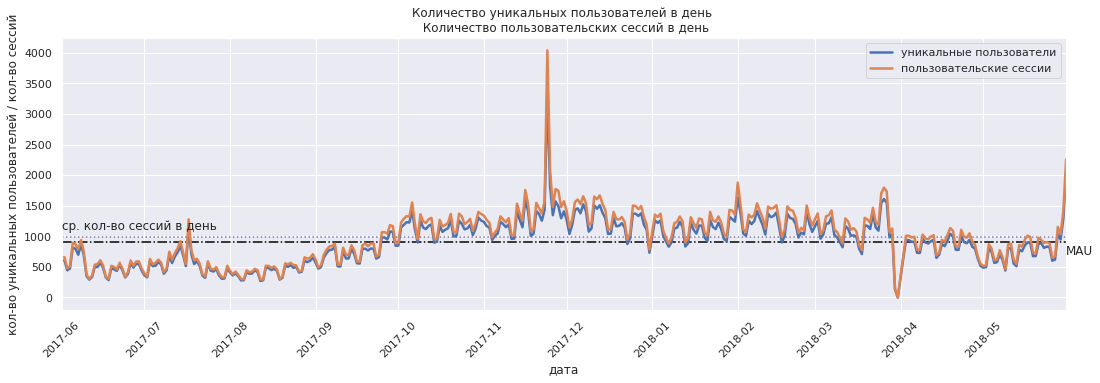

In [ ]:
# График количества уникальных пользователей в день vs количества пользовательских сессий в день
fig, ax = plt.subplots(figsize=(18,5))
sns.lineplot(y='uid', x='session_date', data=visits_day,legend='brief', label=str('уникальные пользователи'), linewidth=2.5)
sns.lineplot(
    y='uid', x='session_date', data=day_session_count, legend='brief', label=str('пользовательские сессии'), linewidth=2.5)
rmin= visits['session_date'].min()
rmax= visits['session_date'].max()
rmin1= day_session_count['session_date'].min()
rmax1= day_session_count['session_date'].max()
w=dau_visits
z=avg_session_count
ax.hlines(w, rmin, rmax, colors='C6', linestyles='dashdot', color=('black'))
ax.hlines(z, rmin1, rmax1, colors='C4', linestyles='dotted')
ax.set_title('Количество уникальных пользователей в день \n Количество пользовательских сессий в день')
ax.set_xlabel('дата')
ax.set_ylabel('кол-во уникальных пользователей / кол-во сессий')
ax.set_xlim(rmin, rmax)
ax.text(rmin1, 1100, 'ср. кол-во сессий в день'), ax.text(rmax, 700, 'MAU')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

plt.show()

**Количество уникальных пользователей в день в целом повторяет динамику пользовательских визитов с небольшой дельтой, пользователи в основном заходят не чаще раза в день на сервис.**

In [ ]:
# Расчет количества визитов пользователя в день
sessions_per_user = visits.groupby('session_date').agg({'uid': ['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (sessions_per_user['n_sessions'] / sessions_per_user['n_users'])
sessions_per_user = sessions_per_user.reset_index()
sessions_per_user['session_date'] = sessions_per_user['session_date'].apply(pd.to_datetime)
sessions_per_user['session_date'] = sessions_per_user['session_date'].dt.date

In [ ]:
# Расчет среднего количества визитов пользователя в день
avg_sessions_per_user = pd.DataFrame(
    {'metric' : 
        'Среднее количество визитов пользователя в день',
     'value' : [sessions_per_user['sessions_per_user'].mean()]})
# Добавление метрики в обущую таблицу метрик
product_metrics = product_metrics.append(avg_sessions_per_user).reset_index(drop=True)
avg_sessions_per_user

metric    value
0  Среднее количество визитов пользователя в день  1.08217

Сервис имеет устоявщуюся аудиторию, пользователи в среднем заходят на сервис 1 раз в день

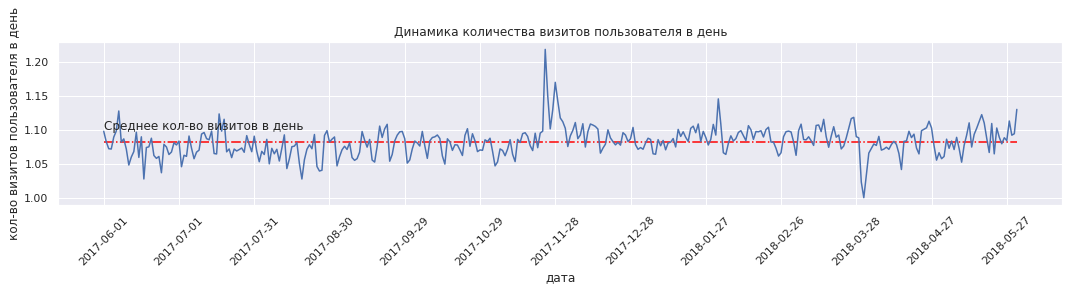

In [ ]:
#График динамики за период количества визитов пользователя в день
fig, ax = plt.subplots(figsize=(18,3))
sns.lineplot(y='sessions_per_user', x='session_date', data=sessions_per_user)
tmin= sessions_per_user['session_date'].min()
tmax= sessions_per_user['session_date'].max()
q=avg_sessions_per_user.iloc[0,1]
ax.hlines(q, tmin, tmax, colors='C6', linestyles='dashdot', color=('red'))
ax.set_title('Динамика количества визитов пользователя в день')
ax.set_xlabel('дата')
ax.set_ylabel('кол-во визитов пользователя в день')
ax.set_xticks(np.arange(tmin, tmax, 30))
ax.text(tmin, 1.10, 'Среднее кол-во визитов в день')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

plt.show()

**Видны недельные колебания, до конца ноября 2017 года пользователи в среднем не заходили больше одного раза на сервис, после всплеска 24 ноября 2017, количество визитов пользователя в день превышает среднее.**

#### Средняя продолжительность сессии ASL

In [ ]:
# Расчет ASL и cредней ASL
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
avg_session = visits['session_duration_sec'].mean()
avg_session = pd.DataFrame(
    {'metric' : 
        'Средняя продолжительность сессии в сек. ASL',
     'value' : [avg_session]})
# Добавление метрики в обущую таблицу метрик
product_metrics = product_metrics.append(avg_session).reset_index(drop=True)
avg_session

metric       value
0  Средняя продолжительность сессии в сек. ASL  643.506489

**Более десяти минут в среднем проводит на сервисе пользователь**

In [ ]:
# Описательные статистики длительности сессии
visits['session_duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

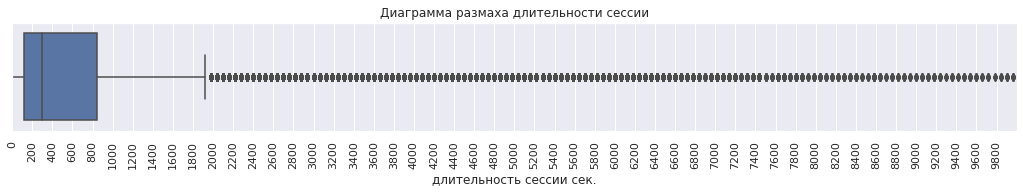

In [ ]:
# Построение диаграммы размаха длительности сессии
plt.figure(figsize=(18, 2))
sns.boxplot(visits['session_duration_sec'], palette='deep')
plt.xticks(np.arange(0,10000,200),rotation=90)
plt.xlabel('длительность сессии сек.')
plt.xlim(0, 10000)
plt.title('Диаграмма размаха длительности сессии')
plt.show() 

**Половина пользователей проводит на сервисе от 2 до 14 минут, незначительное количество пользователей проводит на сервисе более 10 часов, возможно просто не разлогиниваются.**

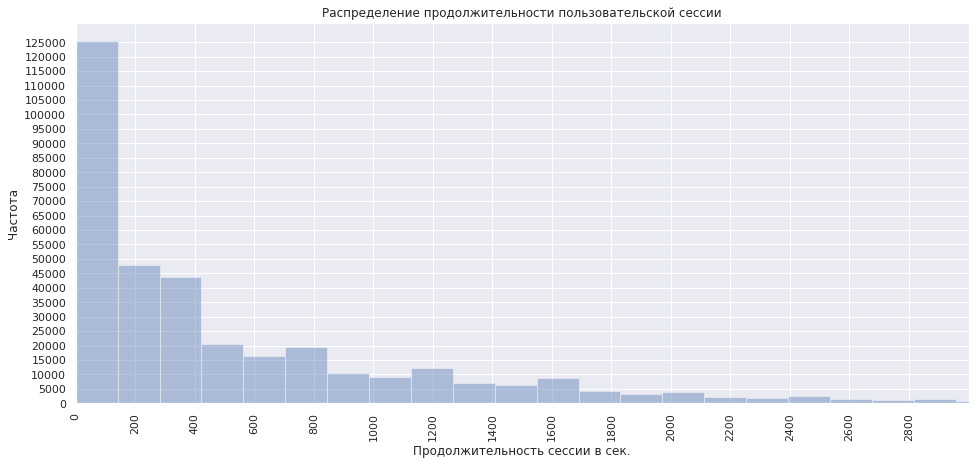

In [ ]:
# Построение гистограммы распределения значений длительности сессии
plt.figure(figsize=(16, 7))
sns.distplot(visits['session_duration_sec'], kde=False, bins=600)
plt.xticks(np.arange(0,3000,200),rotation=90)
plt.yticks(np.arange(0,130000,5000))
plt.xlim(0,3000)
plt.title('Распределение продолжительности пользовательской сессии')
plt.xlabel('Продолжительность сессии в сек.')
plt.ylabel('Частота')
plt.show()

In [ ]:
# Добавление в метрики моды длительности сессий
mode_session = visits['session_duration_sec'].mode()
mode_session = pd.DataFrame(
    {'metric' : 
        'Наиболее частая продолжительность сессии в сек.',
     'value' : [mode_session[0]]})
product_metrics = product_metrics.append(mode_session).reset_index(drop=True)
mode_session

metric  value
0  Наиболее частая продолжительность сессии в сек.     60

**Медианная сессия длится 5 минут, наиболее частые сессии - 1 минута. Скорее всего чаще пользователи ищут что-то конкретное. Разница со средним довольно значительная, существуют очень малое число аномально длинных сессий. Возможно это технический момент, возможно пользователи просто долго не закрывют страницу сервиса.**

#### Retention Rate

In [ ]:
# Расчет дат первого визита
first_visit = visits.groupby(['uid'])['start_ts'].min()
first_visit.name = 'first_visit'
first_visit.sample(3)

uid
11344100010818376996   2017-11-03 16:17:00
14638633072688165907   2017-09-18 01:48:00
7109288228629217749    2018-04-13 09:19:00
Name: first_visit, dtype: datetime64[ns]

In [ ]:
# Добавление столбца с первыми визитами в таблицу visits
visits = visits.join(first_visit, on='uid')
visits.sample(2)

device              end_ts  source_id            start_ts  \
54804  desktop 2017-11-16 11:40:00          5 2017-11-16 11:38:00   
889      touch 2018-01-15 22:55:00          2 2018-01-15 21:51:00   

                        uid session_month session_week session_date  \
54804   4737192264024569913    2017-11-01   2017-11-16   2017-11-16   
889    10225259160915105668    2018-01-01   2018-01-11   2018-01-15   

       session_duration_sec         first_visit  
54804                   120 2017-11-16 11:38:00  
889                    3840 2018-01-15 21:51:00

In [ ]:
# Создание столбцов месяца первого визита и месяца визита, форматирование их в формат первого дня месяца
visits['first_visit_month'] = visits['first_visit'].astype('datetime64[M]')
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')
visits.sample(2)

device              end_ts  source_id            start_ts  \
3501    touch 2017-07-17 20:44:00          4 2017-07-17 20:40:00   
307158  touch 2017-09-20 08:54:00          5 2017-09-20 08:49:00   

                         uid session_month session_week session_date  \
3501    15987519291524737039    2017-07-01   2017-07-13   2017-07-17   
307158  16605210323799998996    2017-09-01   2017-09-14   2017-09-20   

        session_duration_sec         first_visit first_visit_month visit_month  
3501                     240 2017-07-17 20:40:00        2017-07-01  2017-07-01  
307158                   300 2017-09-20 08:49:00        2017-09-01  2017-09-01

In [ ]:
# Расчет Lifetime в рамках когорты
visits['lifetime'] = (visits['visit_month'] - visits['first_visit_month']) / np.timedelta64(1, 'M')
visits['lifetime'] = visits['lifetime'].round().astype('int')
visits.sample(2)

device              end_ts  source_id            start_ts  \
217608  touch 2018-05-09 23:12:00          3 2018-05-09 23:05:00   
312154  touch 2018-03-17 14:42:00          5 2018-03-17 14:29:00   

                         uid session_month session_week session_date  \
217608  17139634048731174884    2018-05-01   2018-05-03   2018-05-09   
312154   5012748374046392787    2018-03-01   2018-03-15   2018-03-17   

        session_duration_sec         first_visit first_visit_month  \
217608                   420 2018-05-09 23:05:00        2018-05-01   
312154                   780 2018-03-17 14:29:00        2018-03-01   

       visit_month  lifetime  
217608  2018-05-01         0  
312154  2018-03-01         0

In [ ]:
# Группировка количества пользователей по месяцу первого визита и lifetime
cohort_visits = visits.groupby(['first_visit_month', 'lifetime']).agg({'uid': 'nunique'}).reset_index()
# Подсчет изначального количества пользователей в когорте
сohort_uid = cohort_visits[cohort_visits['lifetime'] == 0][['first_visit_month', 'uid']]
сohort_uid.columns = ['first_visit_month', 'сohort_uid']
сohort_uid.sample(3)

first_visit_month  сohort_uid
23        2017-08-01       10181
68        2018-02-01       22197
57        2017-12-01       25268

In [ ]:
# Cлияние когорты, количества пользователей, lifetime  c когортой и количеством изначальных пользователей
cohort_visits = cohort_visits.merge(сohort_uid, on='first_visit_month')
cohort_visits.sample(3)

first_visit_month  lifetime    uid  сohort_uid
73        2018-03-01         1    861       20589
55        2017-11-01         5    638       27248
75        2018-04-01         0  15709       15709

In [ ]:
# Расчет Retention Rate
cohort_visits['retention'] = cohort_visits['uid'] / cohort_visits['сohort_uid']
cohort_visits['first_visit_month'] = cohort_visits['first_visit_month'].dt.strftime('%Y-%m')
cohort_visits = cohort_visits.query('lifetime != 0')

In [ ]:
# Группировка значений Retention Rate по корготам и месяцам lifetime
visits_retention_pivot = cohort_visits.pivot_table(
    index = 'first_visit_month', 
columns = 'lifetime', values = 'retention', aggfunc = 'sum')

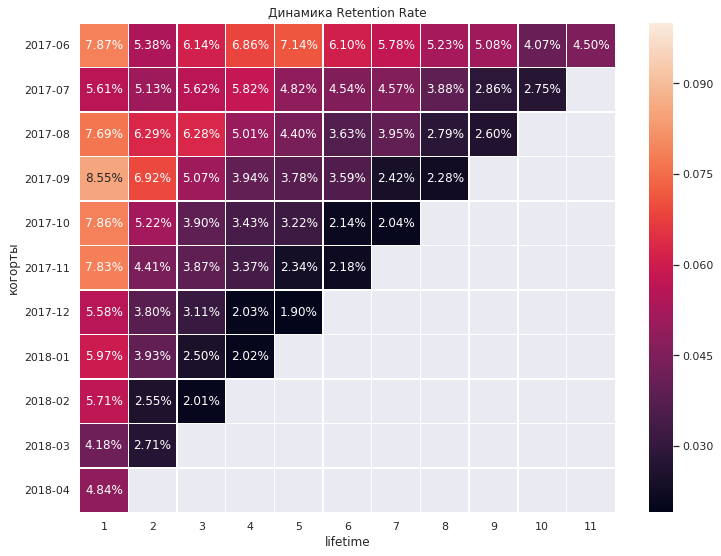

In [ ]:
# Тепловая карта Retention Rate
plt.figure(figsize=(12,9))
sns.heatmap(visits_retention_pivot, linewidths=.4, annot=True, fmt='2.2%', vmax=0.1) 
plt.title('Динамика Retention Rate')
plt.xlabel('lifetime')
plt.ylabel('когорты')

plt.show()

**В целом небольшой процент пользователей возвращается на сервис, самые лояльные пользователи - самые "старые". Пользователи впервые зашедшие на сервис с декабря по апрель реже возращаются позднее. Дельта между количеством сессий и количеством уникальных пользователей на графике выше небольшая, т.е. трафик нагоняется, но возвращаюся немногие.**

In [ ]:
# Расчет средних значений по месяцу lifetime
avg_rr = pd.DataFrame(visits_retention_pivot.mean()).reset_index()
avg_rr.columns = ['lifetime_month', 'averahe_rr_pct']
avg_rr.style.hide_index().format({'averahe_rr_pct' : "{:,.2f}"})

**Средний retention на второй месяц 6,52%** 

In [ ]:
# Добавление среднего Retention Rate по второму месяцу в сводную таблицу метрик
arr = avg_rr.loc[1,:]
arr = pd.DataFrame(
    {'metric' : 
        'Средний % Retention во второй мес.',
     'value' : [arr[1]]})
product_metrics = product_metrics.append(arr).reset_index(drop=True)

In [ ]:
product_metrics.style.format({'value' : "{:,.2f}"})

### Метрики электронной коммерции

#### Cреднее время от визита до покупки

In [ ]:
visits.sample(3)

device              end_ts  source_id            start_ts  \
111607  desktop 2017-11-20 00:36:00          4 2017-11-20 00:34:00   
5329    desktop 2017-10-16 14:02:00          2 2017-10-16 14:02:00   
338111  desktop 2018-03-07 14:41:00          3 2018-03-07 14:40:00   

                         uid session_month session_week session_date  \
111607  17708149783275347012    2017-11-01   2017-11-16   2017-11-20   
5329     3648453708058767050    2017-10-01   2017-10-12   2017-10-16   
338111  18351887184006910130    2018-03-01   2018-03-01   2018-03-07   

        session_duration_sec         first_visit first_visit_month  \
111607                   120 2017-11-20 00:34:00        2017-11-01   
5329                       0 2017-10-16 14:02:00        2017-10-01   
338111                    60 2018-03-07 14:40:00        2018-03-01   

       visit_month  lifetime  
111607  2017-11-01         0  
5329    2017-10-01         0  
338111  2018-03-01         0

In [ ]:
# Расчет даты и времени первого заказа
first_order_d_grouped = orders.groupby('uid')['buy_ts'].min() 
first_order_d_grouped.name = 'first_buy_ts'
first_order_d_grouped.sample(5)

uid
9058136679243261238    2018-02-23 10:39:00
15610674372137086352   2017-07-27 14:48:00
8845088937328044874    2018-02-21 20:35:00
8535163378371520468    2018-04-05 13:08:00
9516934080040585672    2018-05-30 22:51:00
Name: first_buy_ts, dtype: datetime64[ns]

In [ ]:
# Расчет даты и времени первого посещения
first_visits_d_grouped = visits[['uid', 'first_visit']]
first_visits_d_grouped.columns = ['uid', 'first_visit_ts']
first_visits_d_grouped.sample(5)

uid      first_visit_ts
109341  17490939449273546293 2017-11-23 19:52:00
77158     382773498221778980 2018-05-25 19:20:00
264832   5063276008104127926 2017-12-26 19:20:00
136441  11729946835874989767 2018-02-28 10:25:00
291632  16687685912516136087 2017-10-08 12:28:00

In [ ]:
# Слияние данных о визитах и заказах в общую таблицу
first_order_merged = pd.merge(first_order_d_grouped, first_visits_d_grouped, on='uid').reset_index(drop=True)
first_order_merged.sample(5)

uid        first_buy_ts      first_visit_ts
7804   1452409202090327183 2018-03-20 10:21:00 2017-11-21 11:33:00
6763   1254581318249498239 2018-05-05 18:19:00 2017-09-28 21:42:00
16183  3149165237029552924 2017-11-24 16:20:00 2017-10-03 17:40:00
29907  5603453646174104178 2017-06-01 17:16:00 2017-06-01 17:10:00
10218  1905747033655067897 2018-04-07 22:25:00 2018-03-25 11:08:00

In [ ]:
# Расчет времени от первого визита до перовй покупки в минутах
first_order_merged['to_first_order_min'] = (
    first_order_merged.first_buy_ts - first_order_merged.first_visit_ts).dt.seconds/60
first_order_merged.sample(5)

uid        first_buy_ts      first_visit_ts  \
80326  14948239324784388891 2017-10-29 21:04:00 2017-10-28 13:20:00   
41850   7744410643808587193 2017-10-12 09:37:00 2017-10-12 09:28:00   
19248   3626853121480720556 2018-04-19 08:23:00 2017-06-05 14:14:00   
43631   8056418121947262981 2017-06-25 08:54:00 2017-06-04 14:17:00   
5183     970975784987511180 2017-11-04 14:03:00 2017-06-09 20:39:00   

       to_first_order_min  
80326               464.0  
41850                 9.0  
19248              1089.0  
43631              1117.0  
5183               1044.0

In [ ]:
# Описательные статистики времени до первой покупки
first_order_merged['to_first_order_min'].describe()

count    97394.000000
mean       412.501253
std        501.278844
min          0.000000
25%          9.000000
50%        132.000000
75%        839.000000
max       1439.000000
Name: to_first_order_min, dtype: float64

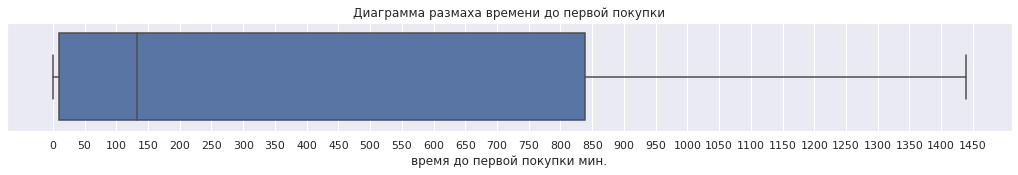

In [ ]:
# Построение диаграммы размаха длительности до первой покупки
plt.figure(figsize=(18, 2))
sns.boxplot(first_order_merged['to_first_order_min'])
plt.xticks(np.arange(0,1500,50))
plt.xlabel('время до первой покупки мин.')
plt.title('Диаграмма размаха времени до первой покупки')
plt.show() 

**Среднее время от визита до покупки почти 7 часов, однако половина пользователей решается на покупку на сервисе от 9 минут до 13 часов, очень большой разброс, при медианном решении - чуть более 2 часов.**

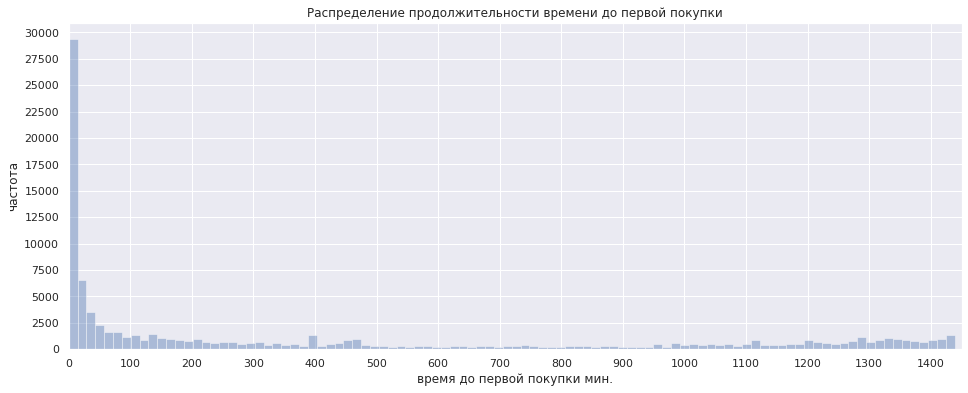

In [ ]:
# Построение гистограммы распределения значений длительности сессии
plt.figure(figsize=(16, 6))

sns.distplot(first_order_merged['to_first_order_min'], kde=False, bins=100)
plt.xticks(np.arange(0,1450,100))
plt.yticks(np.arange(0,31000,2500))
plt.xlim(0,1450)
plt.title('Распределение продолжительности времени до первой покупки')
plt.xlabel('время до первой покупки мин.')
plt.ylabel('частота')

plt.show()

In [ ]:
# Нулевые сессии до покупки
print(
    'Количество нулевых сессий между визитом и покупкой',first_order_merged.query(
        'to_first_order_min == 0')['to_first_order_min'].count())

Количество нулевых сессий между визитом и покупкой 5367


In [ ]:
print((first_order_merged.query(
        'to_first_order_min == 0')['to_first_order_min'].count() /  first_order_merged['to_first_order_min'].count())*100)

5.5106064028584925


In [ ]:
mode_to_first_order = first_order_merged['to_first_order_min'].mode()
economic_metrics = pd.DataFrame(
    {'metric' : ['Среднее время до первой покупки мин.',
     'Медианное время до первой покупки мин.', 'Наиболе частое время до первой покупки мин'], 'value' : [
     first_order_merged['to_first_order_min'].describe()[1],
        first_order_merged['to_first_order_min'].describe()[5], mode_to_first_order.iloc[0]]})
economic_metrics.style.format({'value' : "{:,.2f}"})

<span style='color:blue'>5.5% сессий от визита до покупки - нулевые, они же самые частотные, вероятна техническая проблема, при заказе.</span>

#### Cреднее количество покупок на одного покупателя

In [ ]:
orders['month'] = orders['buy_ts'].astype('datetime64[M]').dt.strftime('%Y-%m')
monthly_orders_grouped = orders.groupby(['month']).agg({'uid': ['count','nunique'], 'revenue':'sum'})
monthly_orders_grouped.columns = ['order_session_qty', 'uid_count', 'revenue_sum']
# Покупки на одного клиента
monthly_orders_grouped ['orders_per_user'] = monthly_orders_grouped['order_session_qty'] / monthly_orders_grouped['uid_count']
monthly_orders_grouped .reset_index(inplace=True)
monthly_orders_grouped.head(6)

month  order_session_qty  uid_count  revenue_sum  orders_per_user
0  2017-06               2354       2023      9557.49         1.163618
1  2017-07               2363       1984     12539.47         1.191028
2  2017-08               1807       1472      8758.78         1.227582
3  2017-09               3387       2750     18345.51         1.231636
4  2017-10               5679       4675     27987.70         1.214759
5  2017-11               5659       4547     27069.93         1.244557

In [ ]:
# Период расчета 6 месяцев
monthly_orders_grouped_6 = monthly_orders_grouped.head(5)

In [ ]:
avg_orders_qty = pd.DataFrame(
    {'metric' : ['Cреднее кол-во покупателей за полгода',
                 'Среднее кол-во покупок пользователя за полгода'],
     'value' : [monthly_orders_grouped['uid_count'].head(5).mean(), monthly_orders_grouped_6['orders_per_user'].mean()]})
economic_metrics = economic_metrics.append(avg_orders_qty)
economic_metrics
avg_orders_qty.style.format({'value' : "{:,.2f}"})

#### Средний чек

In [ ]:
# Группировка количества заказов и выручки по месяцам
monthly_average_order = orders.groupby('month').agg({'uid' : 'count', 'revenue' : 'sum'}).reset_index()
monthly_average_order.columns = ['month', 'orders_qty', 'month_revenue']
monthly_average_order = monthly_average_order.head(12)
monthly_average_order

month  orders_qty  month_revenue
0   2017-06        2354        9557.49
1   2017-07        2363       12539.47
2   2017-08        1807        8758.78
3   2017-09        3387       18345.51
4   2017-10        5679       27987.70
5   2017-11        5659       27069.93
6   2017-12        6218       36388.60
7   2018-01        4721       19417.13
8   2018-02        5281       25560.54
9   2018-03        5326       28834.59
10  2018-04        3273       16858.06
11  2018-05        4346       20735.98

In [ ]:
# Расчет месячного среднего чека
monthly_average_order['revenue_per_order'] = monthly_average_order['month_revenue'] / monthly_average_order['orders_qty']
monthly_average_order.head(12)

month  orders_qty  month_revenue  revenue_per_order
0   2017-06        2354        9557.49           4.060106
1   2017-07        2363       12539.47           5.306589
2   2017-08        1807        8758.78           4.847139
3   2017-09        3387       18345.51           5.416448
4   2017-10        5679       27987.70           4.928280
5   2017-11        5659       27069.93           4.783518
6   2017-12        6218       36388.60           5.852139
7   2018-01        4721       19417.13           4.112927
8   2018-02        5281       25560.54           4.840095
9   2018-03        5326       28834.59           5.413930
10  2018-04        3273       16858.06           5.150645
11  2018-05        4346       20735.98           4.771279

In [ ]:
# Добавление столбца с днем заказа
orders['order_day'] = orders['buy_ts'].astype('datetime64[D]')
# Группировка количества заказов и выручки по дням
daily_average_order = orders.groupby('order_day').agg({'uid': 'count','revenue':'sum'})
daily_average_order.columns = ['order_qty','day_revenue_sum']
# Расчет дневгого среднего чека
daily_average_order['revenue_per_order'] = daily_average_order['day_revenue_sum'] / daily_average_order['order_qty']
daily_average_order.reset_index(inplace=True)
daily_average_order.head()

order_day  order_qty  day_revenue_sum  revenue_per_order
0 2017-06-01         96           389.46           4.056875
1 2017-06-02        111           324.11           2.919910
2 2017-06-03         67           166.48           2.484776
3 2017-06-04         66           195.21           2.957727
4 2017-06-05        161           441.49           2.742174

In [ ]:
m_avg_orders = pd.DataFrame(
    {'metric' : 'Средний чек по месяцам',
     'value' : [monthly_average_order['revenue_per_order'].mean()]})
economic_metrics = economic_metrics.append(m_avg_orders)
economic_metrics
m_avg_orders.style.format({'value' : "{:,.2f}"})

<div class="alert alert-warning" style= "background-color: #d3e5f0" style="border-radius: 15px">
Добавил расчет и график среднего чека по месяцам.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера: вторая итерация ревью <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Да, все верно!

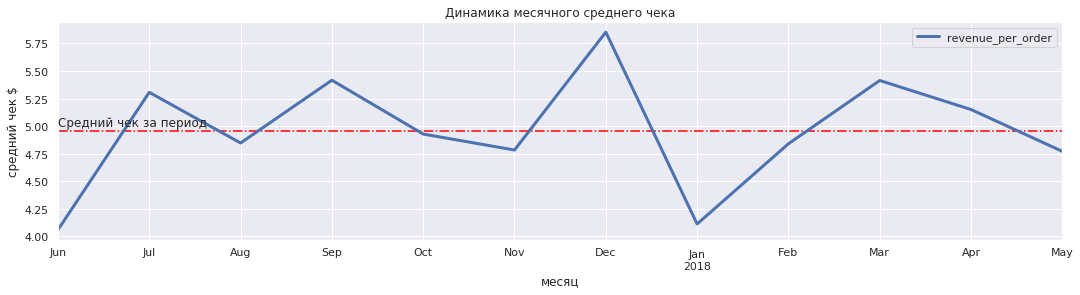

In [ ]:
#График динамики дневного среднего чека
monthly_average_order['month'] = monthly_average_order['month'].astype('datetime64[M]')
fig, ax = plt.subplots(figsize=(18,4))
monthly_average_order.plot(y='revenue_per_order', x='month', linewidth=3, ax=ax)
#amin= monthly_average_order['month'].min()
#amax= monthly_average_order['month'].max()
q=monthly_average_order['revenue_per_order'].mean()
#ax.set_ylim(0,6)
ax.hlines(q, '2017-06', '2018-06', colors='C6', linestyles='dashdot', color=('red'))
ax.text('2017-06',5, 'Средний чек за период')
ax.xaxis.grid(True, which='both')
ax.set_title('Динамика месячного среднего чека')
ax.set_xlabel('месяц')
ax.set_ylabel('средний чек $')
plt.show()

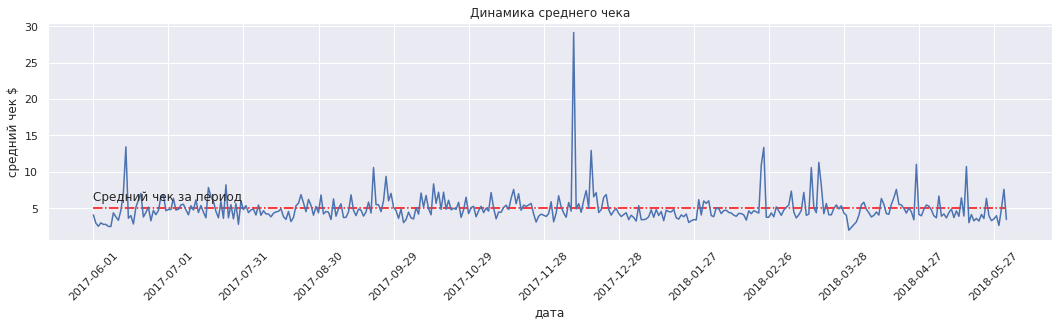

In [ ]:
#График динамики дневного среднего чека
fig, ax = plt.subplots(figsize=(18,4))
sns.lineplot(y='revenue_per_order', x='order_day', data=daily_average_order)
amin= daily_average_order['order_day'].min().date()
amax= daily_average_order['order_day'].max().date()
q=daily_average_order['revenue_per_order'].mean()
ax.hlines(q, amin, amax, colors='C6', linestyles='dashdot', color=('red'))
ax.set_title('Динамика среднего чека')
ax.set_xlabel('дата')
ax.set_ylabel('средний чек $')
ax.set_xticks(np.arange(amin, amax, 30))
ax.text(amin, 6, 'Средний чек за период')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

**В динамик видны пики среднего чека в сентябре, декабре и марте, падение в январе, на графике дневного чреднего чека - всплески более детальны, вероятно совпадают с праздниками, либо популярными мероприятиями, средний чек за период 4.96 долларов.**

#### LTV по когрготам

In [ ]:
orders.sample(5)

buy_ts  revenue                   uid    month  order_day
23953 2017-12-14 01:24:00     4.58  11533641319350714135  2017-12 2017-12-14
39931 2018-03-15 11:36:00     3.67  13229596414095056797  2018-03 2018-03-15
48513 2018-05-22 19:22:00     1.53   5898028965590741397  2018-05 2018-05-22
15642 2017-11-01 13:42:00     1.10   5322774107950861032  2017-11 2017-11-01
19023 2017-11-23 21:13:00     0.73  16840568575376900327  2017-11 2017-11-23

In [ ]:
# Группирока пользователей по месяцу первой покупки
first_orders_m_grouped = orders.groupby('uid').agg({'month': 'min'}).reset_index() 
first_orders_m_grouped.columns = ['uid', 'first_order_month']
first_orders_m_grouped.sample(5)

uid first_order_month
15666   7848800169740990178           2017-12
18276   9252389448171579408           2018-02
31898  16105243436153128509           2018-01
31640  15977738485456295522           2017-10
19247   9736924853170184642           2017-11

In [ ]:
# Расчет когорт по месяцу первой покупки
cohort_by_uid_qty = first_orders_m_grouped.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_by_uid_qty.columns = ['first_order_month', 'uid_count']
cohort_by_uid_qty.head()

first_order_month  uid_count
0           2017-06       2023
1           2017-07       1923
2           2017-08       1370
3           2017-09       2581
4           2017-10       4340

In [ ]:
# Объединение таблицы заказов с датой первой покупки для каждого пользователя
monthly_orders_merged = pd.merge(orders, first_orders_m_grouped, on='uid')
monthly_orders_merged.head()

buy_ts  revenue                   uid    month  order_day  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06 2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06 2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06 2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06 2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06 2017-06-01   

  first_order_month  
0           2017-06  
1           2017-06  
2           2017-06  
3           2017-06  
4           2017-06

In [ ]:
# Группировка по месяцу первой покупки и месяцу заказа
cohorts_orders = monthly_orders_merged.groupby(['first_order_month','month']).agg({'revenue': 'sum'}).reset_index()
cohorts_orders.head()

first_order_month    month  revenue
0           2017-06  2017-06  9557.49
1           2017-06  2017-07   981.82
2           2017-06  2017-08   885.34
3           2017-06  2017-09  1931.30
4           2017-06  2017-10  2068.58

In [ ]:
# Слияние таблицы с размерами коргот c кол-вом уникальных пользователей и коргот заказов по первой покупке с выручкой 
ltv_report = pd.merge(cohort_by_uid_qty, cohorts_orders, on='first_order_month')
ltv_report.head()

first_order_month  uid_count    month  revenue
0           2017-06       2023  2017-06  9557.49
1           2017-06       2023  2017-07   981.82
2           2017-06       2023  2017-08   885.34
3           2017-06       2023  2017-09  1931.30
4           2017-06       2023  2017-10  2068.58

In [ ]:
# Расчет возраста коргот и LTV
ltv_report[['month', 'first_order_month']] = ltv_report[['month', 'first_order_month']].apply(pd.to_datetime)
ltv_report['age'] = (ltv_report['month'] - ltv_report['first_order_month']) / np.timedelta64(1, 'M')
ltv_report['age'] = ltv_report['age'].round().astype('int')

ltv_report['ltv'] = ltv_report['revenue'] / ltv_report['uid_count']
ltv_report['month'] = ltv_report['month'].dt.to_period('M')
ltv_report['first_order_month'] = ltv_report['first_order_month'].dt.to_period('M')           
ltv_report.shape

(79, 6)

In [ ]:
# Группировка итоговой таблицы
ltv_pivot = ltv_report.pivot_table(
                        index='first_order_month', 
                        columns='age', 
                        values='ltv', 
                        aggfunc='mean').round(2)
ltv_pivot = ltv_pivot.cumsum(axis=1)

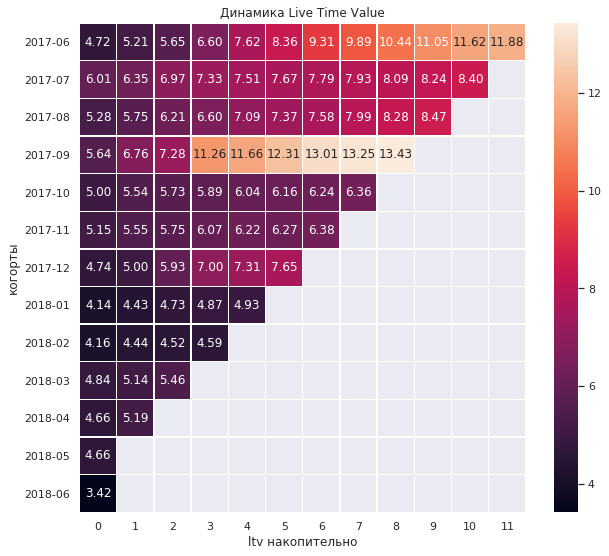

In [ ]:
# Тепловая карта среднего LTV
plt.figure(figsize=(10,9))
sns.heatmap(ltv_pivot, linewidths=.4, annot=True, fmt='2.2f') 
plt.title('Динамика Live Time Value')
plt.xlabel('ltv накопительно')
plt.ylabel('когорты')
plt.show()

**Больше всех приносят деньги более "старые корготы", можно выделить сентябрьскую корготу и декабрьскую, из "молодых" - мартовскую. Если пришедших в декабре и марте можно связать с праздниками то сентябрьскую - возможно с началом учебного года.**

In [ ]:
# Расчет средних значений по месяцу lifetime
avg_ltv = pd.DataFrame(ltv_pivot.mean()).reset_index()
avg_ltv.columns = ['lifetime_month', 'average_ltv']
avg_ltv.style.hide_index().format({'average_ltv' : "{:,.2f}"})

**Средний LTV к 6 месяцу 7.29 его превышают июньская, сентябрьская и декабрьская корготы**

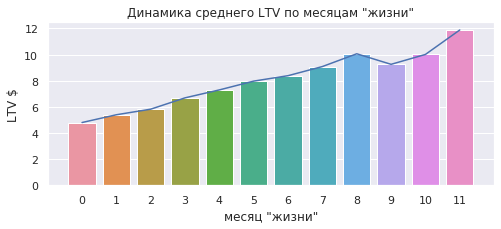

In [ ]:
#График динамики среднего LTV 
fig, ax = plt.subplots(figsize=(8,3))
sns.barplot(y='average_ltv', x='lifetime_month', data=avg_ltv)
sns.lineplot(y='average_ltv', x='lifetime_month', data=avg_ltv)
ax.set_title('Динамика среднего LTV по месяцам "жизни"')
ax.set_xlabel('месяц "жизни"')
ax.set_ylabel('LTV $')
ax.set_xlim(-1,12)

plt.show()

In [ ]:
# Добавление среднего LTV  за 6 месяцев в сводную таблицу метрик
altv = avg_ltv.loc[5,:]
altv = pd.DataFrame(
    {'metric' : 
        'Средний LTV за 6 мес $.',
     'value' : [altv['average_ltv']]})
economic_metrics = economic_metrics.append(altv).reset_index(drop=True)

In [ ]:
economic_metrics.style.format({'value' : "{:,.2f}"})

### Маркетинговые метрики

#### Общая сумма расходов на маркетинг

In [ ]:
marketing_metrics = pd.DataFrame(
    {'metric' : ['Сумма общих расходов', 'Сумма общих доходов'], 'value' : [costs.costs.sum(), orders.revenue.sum()]})
marketing_metrics

metric      value
0  Сумма общих расходов  329131.62
1   Сумма общих доходов  252057.20

In [ ]:
# Добавление столбца с месяцем проведения рекламной кампании
costs['month'] = costs['dt'].astype('datetime64[M]')
costs['week'] = costs['dt'].astype('datetime64[W]')
costs.sample(3)

source_id         dt   costs      month       week
867           3 2017-10-20  516.12 2017-10-01 2017-10-19
2400         10 2018-01-08   20.44 2018-01-01 2018-01-04
306           1 2018-04-05   43.52 2018-04-01 2018-04-05

In [ ]:
# Группировка расходов по рекламным источникам
costs_by_source_id = costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()
costs_by_source_id.sample(3)

source_id     costs
5          9   5517.49
6         10   5822.49
4          5  51757.10

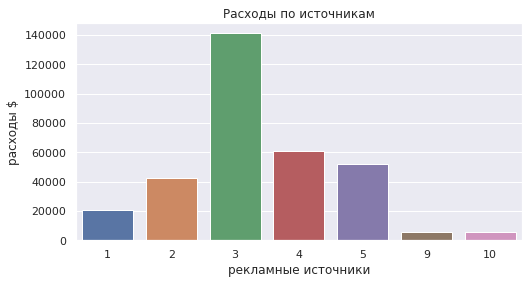

In [ ]:
#График расходов рекламным источникам 
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(y='costs', x='source_id', data=costs_by_source_id)
ax.set_title('Расходы по источникам')
ax.set_xlabel('рекламные источники')
ax.set_ylabel('расходы $')

plt.show()

**Абсолютный лидер по расходам - источник 3, минимальные расходы у 9 и 10 источника**

In [ ]:
costs.sample()

source_id         dt   costs      month       week
801          3 2017-08-15  192.73 2017-08-01 2017-08-10

In [ ]:
# Группировка по общим расходам и расходов по источникам
costs_by_months = costs.groupby(['month'])['costs'].agg(costs_sum='sum').reset_index()
sources_costs_by_month = costs.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum')
sources_costs_by_week = costs.pivot_table(index='week', columns='source_id', values='costs', aggfunc='sum')

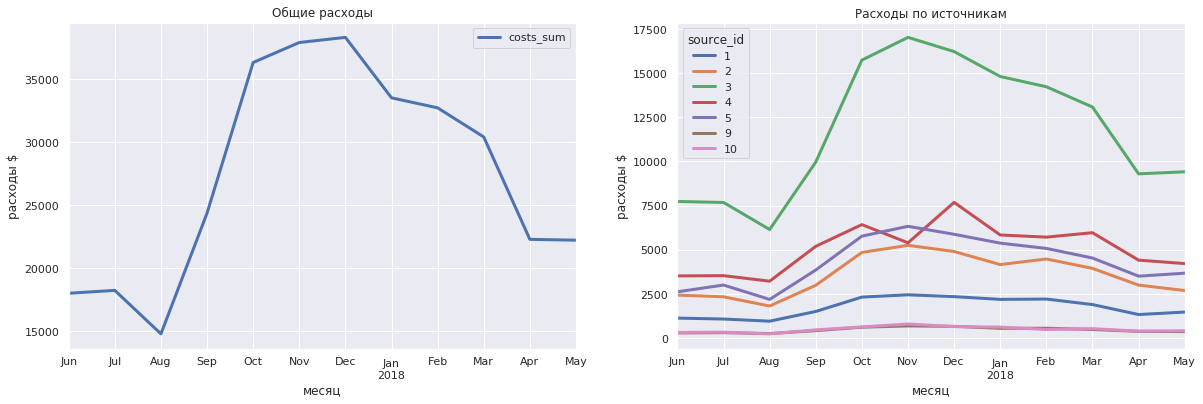

In [ ]:
# Визуализация динамики общих расходов
fig, axes = plt.subplots(1,2,figsize=(20,6))
axes[0] = costs_by_months.plot(x='month', y='costs_sum', linewidth=3, ax=axes[0])
axes[0].xaxis.grid(True, which='both')
axes[0].set_title('Общие расходы')
axes[0].set_xlabel('месяц')
axes[0].set_ylabel('расходы $')
axes[1] = sources_costs_by_month.plot(linewidth=3, ax=axes[1])
axes[1].xaxis.grid(True, which='both')
axes[1].set_title('Расходы по источникам')
axes[1].set_xlabel('месяц')
axes[1].set_ylabel('расходы $')

plt.show()

**Динамика расходов самого дорого источника номер 3 повторяют динамику общих расходов. Виден также полугодовой пик расходов с сентября по март, для сервиса это "горячий" сезон.**

In [ ]:
orders['week'] = orders['buy_ts'].astype('datetime64[W]')
weekly_orders_grouped = orders.groupby(['week']).agg({'revenue':'sum'}).reset_index()

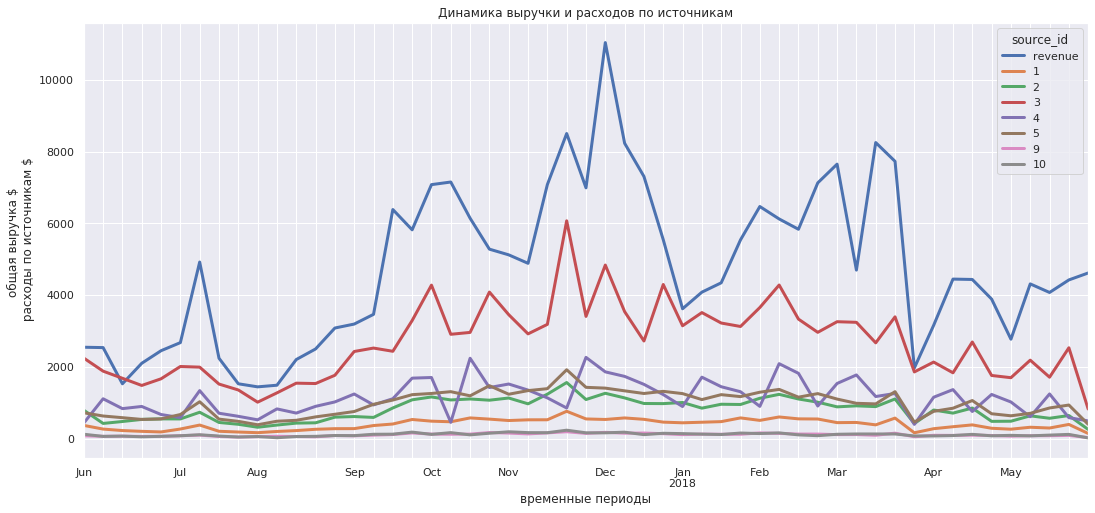

In [ ]:
# Визуализация динамики расходов по источникам
fig, ax = plt.subplots(figsize=(18,8))
weekly_orders_grouped.plot(x='week', y='revenue', ax=ax, linewidth=3)
ax.xaxis.grid(True, which='both')
sources_costs_by_week.plot(ax=ax, linewidth=3)
plt.title('Динамика выручки и расходов по источникам')
plt.xlabel("временные периоды")
plt.ylabel("общая выручка $ \n расходы по источникам $")
plt.show()

**На недельном таймфрейме в виден новогодний и мартовский пик расходов по третьему источнику который повторяет динамику выручки, но в феврале - марте дельта между ним и выручкой увеличивается, что говорит о снижении эффективности источника в этот период. 1,9,10 источники стабильны в расходах с минимальной корелляцией с выручкойв динамике.**

#### СAC стоимость расходов на привлечение одного пользователя

In [ ]:
# Cэмппл текущей таблицы визитов
visits.sample()

device              end_ts  source_id            start_ts  \
236416  desktop 2018-03-19 16:49:00          1 2018-03-19 16:27:00   

                        uid session_month session_week session_date  \
236416  4435931324057795549    2018-03-01   2018-03-15   2018-03-19   

        session_duration_sec         first_visit first_visit_month  \
236416                  1320 2017-08-11 12:10:00        2017-08-01   

       visit_month  lifetime  
236416  2018-03-01         7

In [ ]:
#Cэмпл текущей таблицы заказов
orders.sample()

buy_ts  revenue                   uid    month  order_day  \
6486 2017-08-31 16:00:00     2.75  11331437593475183243  2017-08 2017-08-31   

           week  
6486 2017-08-31

In [ ]:
# Сэмпл текущей таблицы расходов
costs.sample()

source_id         dt  costs      month       week
2005          9 2017-12-07  29.08 2017-12-01 2017-12-07

In [ ]:
# Группировка первого визита по пользователям и источнику перехода
visits['first_visit'] = visits['first_visit'].astype('datetime64[D]')
first_visit_source = visits.groupby(['uid', 'source_id']).agg({'first_visit': 'min'}).reset_index()
first_visit_source.columns = ['uid', 'source_id', 'first_activity']
first_visit_source.shape

(277870, 3)

In [ ]:
# Группировка даты первого заказа по пользователям
first_orders_data = orders.groupby('uid').agg({'order_day': 'min'}).reset_index()
first_orders_data.columns = ['uid', 'first_activity']
first_orders_data.sample(3)

uid first_activity
5762    2911406757797037344     2018-03-19
31072  15664868192636747255     2017-10-07
18874   9554612684008451898     2017-12-05

In [ ]:
# Слияние таблицы с источниками визитов с таблицей покупок, остаются только uid сделавших покупку
orders_by_source = pd.merge(first_visit_source, first_orders_data, on=['uid', 'first_activity'])
orders_by_source.sample(3)

uid  source_id first_activity
15637   8473330989288927363          1     2018-01-21
25628  14109003039249172879          4     2018-03-26
14340   7730168320023604278          5     2018-05-03

In [ ]:
# Формирование коргот покупателей по источникам 
orders_by_source['month'] = orders_by_source['first_activity'].astype('datetime64[M]')
cohorts_source = orders_by_source.groupby(['month', 'source_id']).agg({'uid':'nunique'}).reset_index()
cohorts_source.head()

month  source_id  uid
0 2017-06-01          1  283
1 2017-06-01          2  331
2 2017-06-01          3  723
3 2017-06-01          4  518
4 2017-06-01          5  485

In [ ]:
# Формирование когорт по затратам на источники
costs_by_source = costs.groupby(['month', 'source_id']).agg({'costs':'sum'}).reset_index()
costs_by_source.head()

month  source_id    costs
0 2017-06-01          1  1125.61
1 2017-06-01          2  2427.38
2 2017-06-01          3  7731.65
3 2017-06-01          4  3514.80
4 2017-06-01          5  2616.12

In [ ]:
# Слияние количества покупателей и затрат по корготам и источнику
cac_report = cohorts_source.merge(costs_by_source, on=['month', 'source_id'])
# Расчет CAC
cac_report['cac'] = cac_report['costs'] / cac_report['uid']
cac_report['month'] = cac_report['month'].dt.strftime('%Y-%m')
cac_report.head()

month  source_id  uid    costs        cac
0  2017-06          1  283  1125.61   3.977420
1  2017-06          2  331  2427.38   7.333474
2  2017-06          3  723  7731.65  10.693845
3  2017-06          4  518  3514.80   6.785328
4  2017-06          5  485  2616.12   5.394062

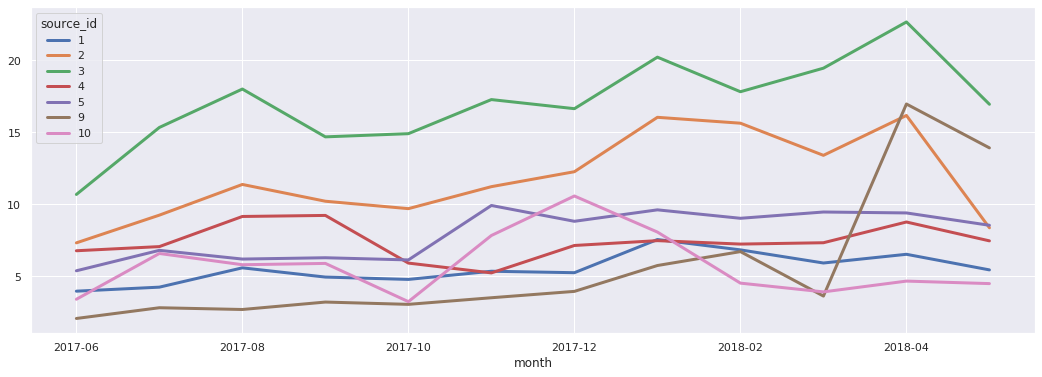

In [ ]:
# Динамика СAC по месяцам в разрезе источников
cac_report_pivot = cac_report.pivot_table(index='month', columns='source_id', values='cac', aggfunc='mean')
fig, ax = plt.subplots(figsize=(18,8))
cac_report_pivot.plot(figsize=(18,6), ax=ax, linewidth=3)
ax.xaxis.grid(True, which='both')
plt.show()

**Третий источник - лидер по стоимости одного покупателя, дорогие покупатели также у второго источника, хотя в абсолютных числах расходы на него только на 4 месте.**

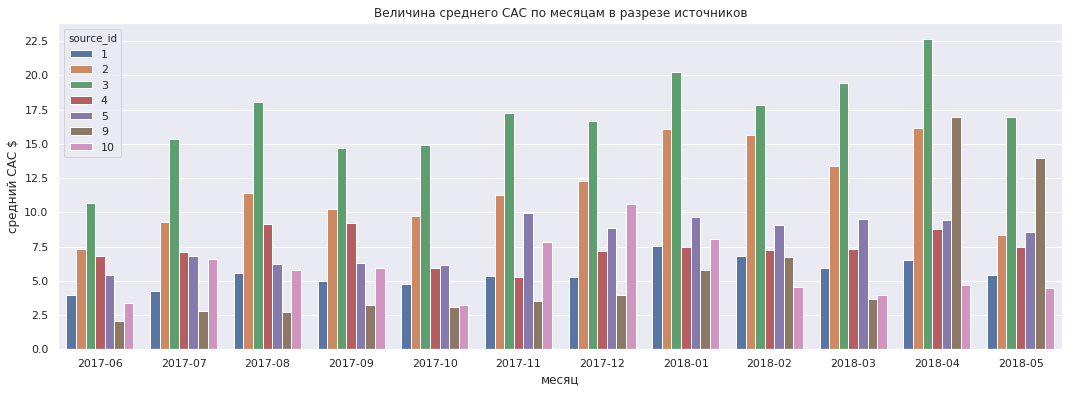

In [ ]:
# График динамики среднего СAC по месяцам в разрезе источников
avg_cac_montly = cac_report.groupby(['month','source_id'])['cac'].agg(avg_cac='mean').reset_index()
fig, ax = plt.subplots(figsize=(18,6))
sns.barplot(data=avg_cac_montly, x='month', y='avg_cac', hue='source_id')
ax.set_title('Величина среднего CAC по месяцам в разрезе источников')
ax.set_xlabel('месяц')
ax.set_ylabel('средний CAC $')
ax.set_yticks(np.arange(0,25,2.5))
plt.show()

**В апреле - мае 2018 резко вырасли расходы на 9 источник, резко упали расходы на 2 источник**

In [ ]:
# Расчет среднего СAC по источникам, за весь период
avg_cac = cac_report.groupby('source_id')['cac'].agg(avg_cac='mean').reset_index()
avg_cac.style.hide_index()

In [ ]:
# Cредний СAC по месяцам
avg_cac_montly = cac_report.groupby('month')['cac'].agg(avg_cac='mean').reset_index()
avg_cac_montly

month    avg_cac
0   2017-06   5.668780
1   2017-07   7.453716
2   2017-08   8.414263
3   2017-09   7.792002
4   2017-10   6.830061
5   2017-11   8.632505
6   2017-12   9.246076
7   2018-01  10.686472
8   2018-02   9.695956
9   2018-03   9.028205
10  2018-04  12.177820
11  2018-05   9.321565

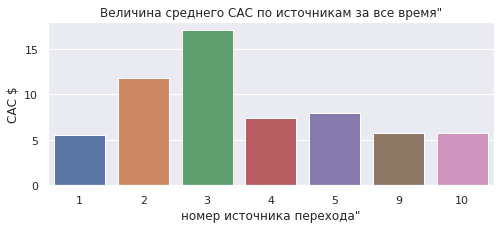

In [ ]:
#График среднего CAC по источникам
fig, ax = plt.subplots(figsize=(8,3))
sns.barplot(y='avg_cac', x='source_id', data=avg_cac)
ax.set_title('Величина среднего CAC по источникам за все время"')
ax.set_xlabel('номер источника перехода"')
ax.set_ylabel('CAC $')
plt.show()

In [ ]:
# Добавление общего среднего СAC в таблицу метрик
avg_cac_per_user = pd.DataFrame(
    {'metric' : 'Cредний CAC на одного покупателя $',
     'value' : [(cac_report['costs'].mean()) / (cac_report['uid'].mean())]})
marketing_metrics = marketing_metrics.append(avg_cac_per_user)
avg_cac_per_user.style.format({'value' : "{:,.2f}"})

#### ROMI по корготам в разрезе источников

In [ ]:
# Cэмпл оригинальной таблицы визитов
visits_original.sample()

device              end_ts  source_id            start_ts  \
227139  touch 2017-09-22 12:58:00          5 2017-09-22 12:57:00   

                         uid  
227139  16280966658486742408

In [ ]:
# Добавление столбца с датой сессии
visits_original['session_date'] = visits_original['start_ts'].astype('datetime64[D]')
# Группировка пользователей пр дате первой сессии
first_visit_grouped = visits_original.groupby('uid').agg({'session_date': 'min'}).reset_index()
first_visit_grouped.columns = ['uid', 'first_activity_data']
first_visit_grouped.sample()

uid first_activity_data
205007  16558543552459331392          2018-04-08

In [ ]:
# Добавление в таблицу визитов даты первой сессии
visits_original = pd.merge(visits_original, first_visit_grouped, on='uid')
visits_original

device              end_ts  source_id            start_ts  \
0         touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1       desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2         touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3       desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4       desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   
...         ...                 ...        ...                 ...   
359395  desktop 2018-04-23 21:19:00         10 2018-04-23 21:11:00   
359396  desktop 2017-11-08 13:39:00          4 2017-11-08 13:39:00   
359397  desktop 2017-07-31 12:31:00          3 2017-07-31 12:13:00   
359398  desktop 2018-03-20 15:25:00          4 2018-03-20 15:11:00   
359399    touch 2018-04-03 11:23:00          5 2018-04-03 11:19:00   

                         uid session_date first_activity_data  
0       16879256277535980062   2017-12-20          2017-12-20  
1         104060357244891740   2018-02-19          2018-02-19  
2        7459035603376831527   2017-07-01          2017-07-01  
3       16174680259334210214   2018-05-20          2018-03-09  
4       16174680259334210214   2018-03-09          2018-03-09  
...                      ...          ...                 ...  
359395  12734910664455613822   2018-04-23          2018-04-23  
359396   6761309174945977743   2017-11-08          2017-11-08  
359397  11102751930812818282   2017-07-31          2017-07-31  
359398    272012551460639309   2018-03-20          2018-03-20  
359399   3266363999948772866   2018-04-03          2018-04-03  

[359400 rows x 7 columns]

In [ ]:
# Фильтр визитов где дата первого визита равна дате сессии, группировка по пользователю
filtered_visits = visits_original[
    visits_original['session_date'] == visits_original[
        'first_activity_data']][['source_id', 'uid']].groupby('uid')['source_id'].agg(source_id='mean').reset_index()
filtered_visits['source_id'] = filtered_visits['source_id'].astype('int')
filtered_visits

uid  source_id
0             11863502262781          3
1             49537067089222          2
2            297729379853735          3
3            313578113262317          2
4            325320750514679          5
...                      ...        ...
228164  18446403737806311543          5
228165  18446424184725333426          4
228166  18446556406699109058          3
228167  18446621818809592527          4
228168  18446676030785672386          3

[228169 rows x 2 columns]

In [ ]:
# Сэмпл таблицы заказов
orders_original.sample()

buy_ts  revenue                  uid
17604 2017-11-15 10:13:00     6.72  2051947563433880424

In [ ]:
# Добавление в заказы столбца с днем заказа
orders_original['order_day'] = orders_original['buy_ts'].astype('datetime64[D]')
# добавление в заказы столбца с месяцем заказа
orders_original['month'] = orders_original['order_day'].astype('datetime64[M]')
orders_original

buy_ts  revenue                   uid  order_day      month
0     2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 2017-06-01
1     2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 2017-06-01
2     2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 2017-06-01
3     2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 2017-06-01
4     2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 2017-06-01
...                   ...      ...                   ...        ...        ...
50410 2018-05-31 23:50:00     4.64  12296626599487328624 2018-05-31 2018-05-01
50411 2018-05-31 23:50:00     5.80  11369640365507475976 2018-05-31 2018-05-01
50412 2018-05-31 23:54:00     0.30   1786462140797698849 2018-05-31 2018-05-01
50413 2018-05-31 23:56:00     3.67   3993697860786194247 2018-05-31 2018-05-01
50414 2018-06-01 00:02:00     3.42     83872787173869366 2018-06-01 2018-06-01

[50415 rows x 5 columns]

In [ ]:
# Вывод датаы первого заказа по покупателю
first_order = orders_original.groupby('uid').agg({'order_day': 'min'}).reset_index()
first_order.columns = ['uid', 'first_activity_data']
first_order.sample(3)

uid first_activity_data
9407   4753773255036098375          2017-07-04
2877   1457519551239690752          2017-11-14
10431  5241639641294522874          2017-07-17

In [ ]:
# Добавление даты первого заказа в заказы
orders_original = pd.merge(orders_original, first_order, on='uid').reset_index(drop=True)
orders_original

buy_ts  revenue                   uid  order_day  \
0     2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01   
1     2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01   
2     2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01   
3     2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01   
4     2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01   
...                   ...      ...                   ...        ...   
50410 2018-05-31 23:50:00     4.64  12296626599487328624 2018-05-31   
50411 2018-05-31 23:50:00     5.80  11369640365507475976 2018-05-31   
50412 2018-05-31 23:54:00     0.30   1786462140797698849 2018-05-31   
50413 2018-05-31 23:56:00     3.67   3993697860786194247 2018-05-31   
50414 2018-06-01 00:02:00     3.42     83872787173869366 2018-06-01   

           month first_activity_data  
0     2017-06-01          2017-06-01  
1     2017-06-01          2017-06-01  
2     2017-06-01          2017-06-01  
3     2017-06-01          2017-06-01  
4     2017-06-01          2017-06-01  
...          ...                 ...  
50410 2018-05-01          2018-05-31  
50411 2018-05-01          2018-05-31  
50412 2018-05-01          2018-05-31  
50413 2018-05-01          2018-05-31  
50414 2018-06-01          2018-06-01  

[50415 rows x 6 columns]

In [ ]:
# Добавление месяца первого заказа в заказы
orders_original['first_order_month'] = orders_original['first_activity_data'].astype('datetime64[M]')
orders_original.sample()

buy_ts  revenue                  uid  order_day      month  \
28441 2017-12-25 17:49:00      2.2  2150215555183010318 2017-12-25 2017-12-01   

      first_activity_data first_order_month  
28441          2017-12-16        2017-12-01

In [ ]:
# Добавление источников первого визита в заказы
visits_orders_merged = pd.merge(orders_original, filtered_visits, on='uid')
visits_orders_merged

buy_ts  revenue                   uid  order_day  \
0     2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01   
1     2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01   
2     2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01   
3     2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01   
4     2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01   
...                   ...      ...                   ...        ...   
50410 2018-05-31 23:50:00     4.64  12296626599487328624 2018-05-31   
50411 2018-05-31 23:50:00     5.80  11369640365507475976 2018-05-31   
50412 2018-05-31 23:54:00     0.30   1786462140797698849 2018-05-31   
50413 2018-05-31 23:56:00     3.67   3993697860786194247 2018-05-31   
50414 2018-06-01 00:02:00     3.42     83872787173869366 2018-06-01   

           month first_activity_data first_order_month  source_id  
0     2017-06-01          2017-06-01        2017-06-01          1  
1     2017-06-01          2017-06-01        2017-06-01          2  
2     2017-06-01          2017-06-01        2017-06-01          2  
3     2017-06-01          2017-06-01        2017-06-01          2  
4     2017-06-01          2017-06-01        2017-06-01          3  
...          ...                 ...               ...        ...  
50410 2018-05-01          2018-05-31        2018-05-01          4  
50411 2018-05-01          2018-05-31        2018-05-01         10  
50412 2018-05-01          2018-05-31        2018-05-01          3  
50413 2018-05-01          2018-05-31        2018-05-01          3  
50414 2018-06-01          2018-06-01        2018-06-01          4  

[50415 rows x 8 columns]

In [ ]:
# Cэмпл таблицы расходов
costs_original.sample()

source_id         dt  costs
1991          9 2017-11-23  29.16

In [ ]:
# Добавление месяца расходов в расходы
costs_original['month'] = costs_original['dt'].astype('datetime64[M]')
costs_original.sample()

source_id         dt   costs      month
1005          3 2018-03-07  996.15 2018-03-01

In [ ]:
# Функция вчисления ROMI По источникам
def romi_by_source(orders_filtered, costs_filtered, source_n):
    # Расчет размера когорт по кол-ву уникальных покупателей по заказам отфильтрованным по источнику
    coghort_size_n_buyers_x = orders_filtered.groupby('first_order_month').agg({'uid' : 'nunique'}).reset_index()
    coghort_size_n_buyers_x.columns = ['first_order_month', 'n_buyers']
    
    # Группировка заказов по месяцу первого заказ, месяцу зказа, суммирование выручки
    cohorts_x = orders_filtered.groupby(['first_order_month', 'month']).agg({'revenue': 'sum'}).reset_index()
   
    # Объеднине когорт с кол-вом уникальных покупателей и когорт с выручкой
    coghort_report_x = pd.merge(coghort_size_n_buyers_x, cohorts_x, on='first_order_month')
    
    # Выделение столбца с возрастом когорты и расчет LTV
    coghort_report_x['age'] = (coghort_report_x['month'] - coghort_report_x['first_order_month']) / np.timedelta64(1, 'M')
    coghort_report_x['age'] = coghort_report_x['age'].round().astype('int')
    
    # Расчет LTV
    coghort_report_x['ltv'] = coghort_report_x['revenue'] / coghort_report_x['n_buyers']
    
    # Таблица расходов отфильтрованных по источнику
    costs_by_month_x = costs_filtered[['month', 'costs']]
    
    # Расчет расходов по месяцам
    costs_by_month_x = costs_by_month_x.groupby('month').sum()
    
    # Объединение отчета LTV по когортам и расходов по месяцам
    ltv_cac_report_x = pd.merge(coghort_report_x, costs_by_month_x, left_on='first_order_month', right_on='month')
    
    # Расчет CAC
    ltv_cac_report_x['cac'] = ltv_cac_report_x['costs'] / ltv_cac_report_x['n_buyers']
    
    # Расчет ROMI
    ltv_cac_report_x['romi'] = ltv_cac_report_x['ltv'] / ltv_cac_report_x['cac']
    
    # Формат когорты год-месяц
    ltv_cac_report_x['first_order_month'] = ltv_cac_report_x['first_order_month'].dt.strftime('%Y-%m')
    
    # Построение Pivot по источнику
    romi_pivot_x = ltv_cac_report_x.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean').cumsum(axis=1)
    
    return plt.figure(figsize=(12,8)),sns.heatmap(romi_pivot_x, linewidths=.4, annot=True, fmt='2.2f'), plt.title(
        'ROMI' + ' ' + 'источник' + ' ' + str(source_n)), plt.xlabel('ROMI накопительно'), plt.ylabel(
        'когорты')   

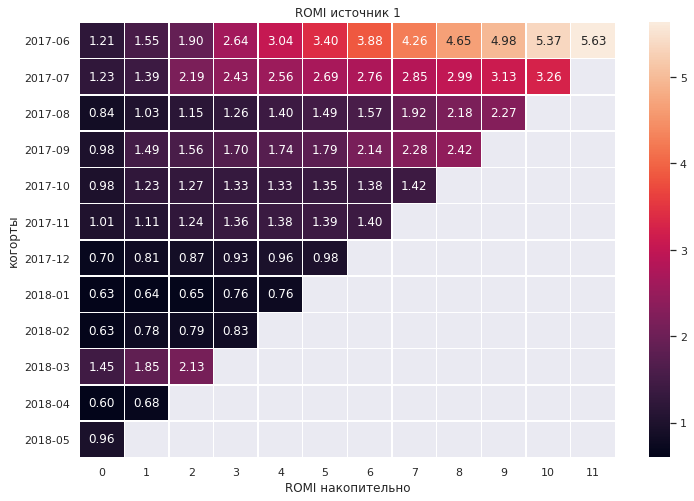

In [ ]:
# Тепловая карта окупаемости источника 1
romi_by_source((visits_orders_merged[visits_orders_merged['source_id'] == 1]),
               (costs_original[costs_original['source_id'] == 1]),1)         
plt.show()

**5-й по сумме расходов источник, на конец периода не окупились только апрельская и майская корготы, высокая эффективность.**

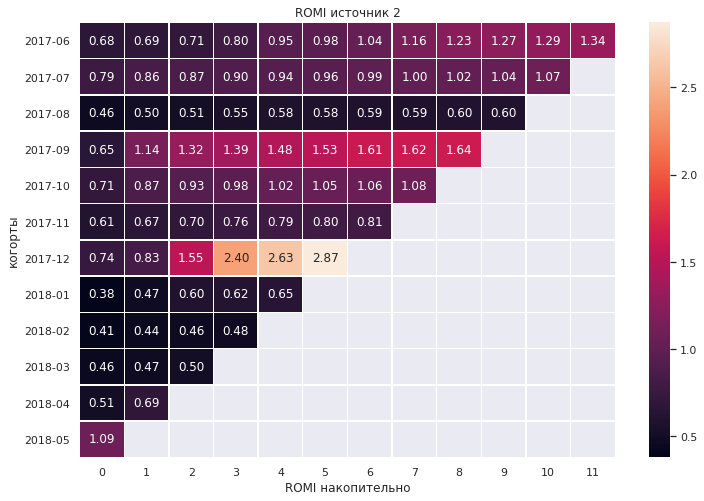

In [ ]:
# Тепловая карта окупаемости источника 2
romi_by_source((visits_orders_merged[visits_orders_merged['source_id'] == 2]),
               (costs_original[costs_original['source_id'] == 2]),2)
plt.show()

**Среднефээективный источник, самые быстрокупаемые корготы - сентябрь, декабрь, май**

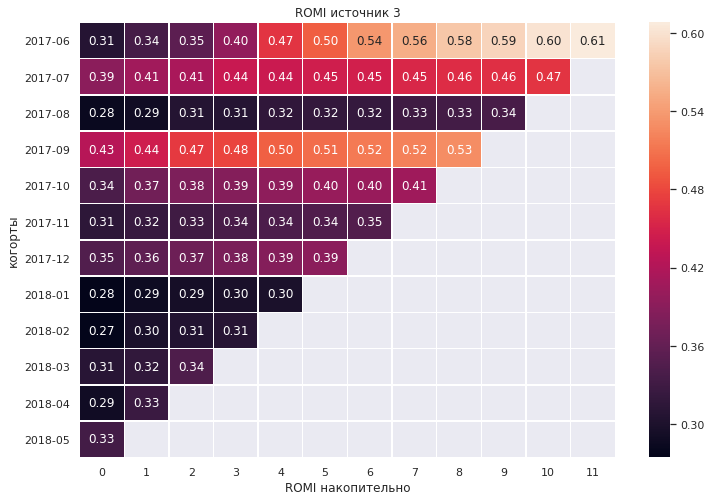

In [ ]:
# Тепловая карта окупаемости источника 3
romi_by_source(visits_orders_merged[visits_orders_merged['source_id'] == 3],
               costs_original[costs_original['source_id'] == 3],3)
plt.show()

**Самый дорогой источник в абсолютных суммах и в пересчете на пользователя, ни одна коргота не вышла на окупаемость за период**

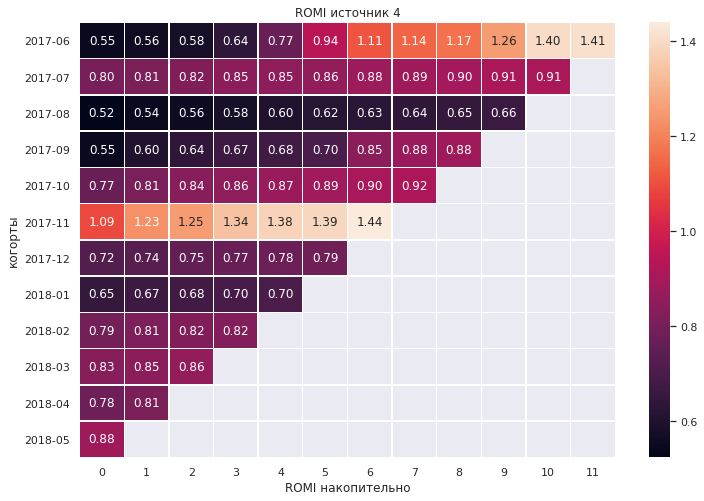

In [ ]:
# Тепловая карта окупаемости источника 4
romi_by_source(visits_orders_merged[visits_orders_merged['source_id'] == 4],
               costs_original[costs_original['source_id'] == 4],4)
plt.show()

**Относительно недорогой источник, скорее всего половина коргот окупиться за год.**

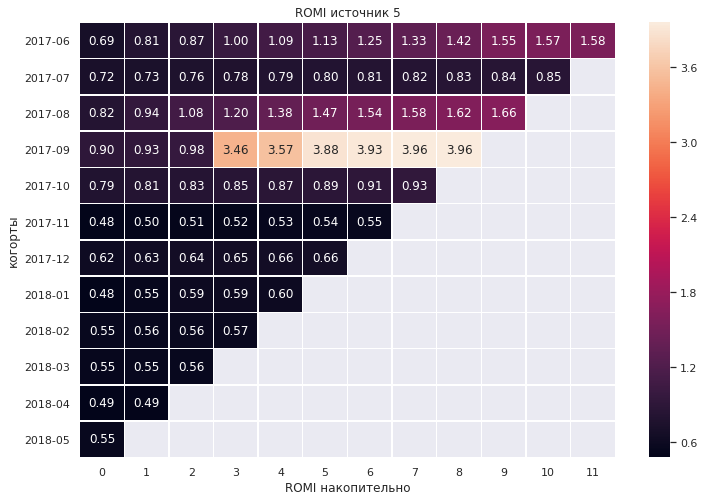

In [ ]:
# Тепловая карта окупаемости источника 5
romi_by_source(visits_orders_merged[visits_orders_merged['source_id'] == 5],
               costs_original[costs_original['source_id'] == 5],5)
plt.show()

**Лучше окупаются корготы с июня по октябрь, только половина коргот окупятся, за период больше года**

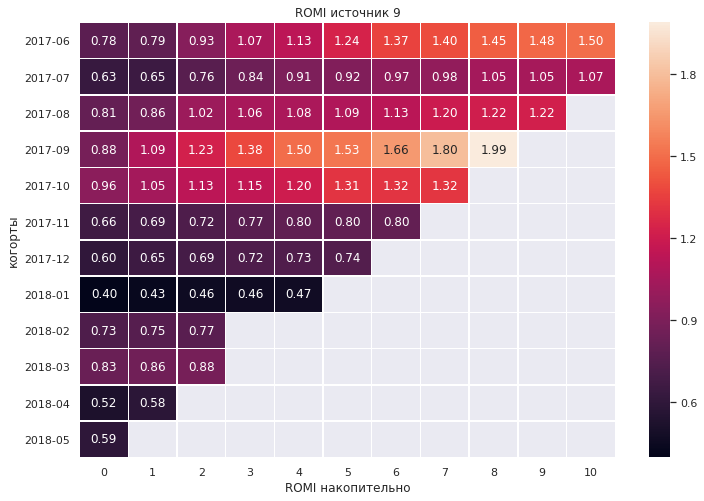

In [ ]:
# Тепловая карта окупаемости источника 9
romi_by_source(visits_orders_merged[visits_orders_merged['source_id'] == 9],
               costs_original[costs_original['source_id'] == 9],9)
plt.show()

**Хорошая окупаесмость, слабые - корготы межсезонья, январь, февраль, большинство коргот вероятно окупятся за год**

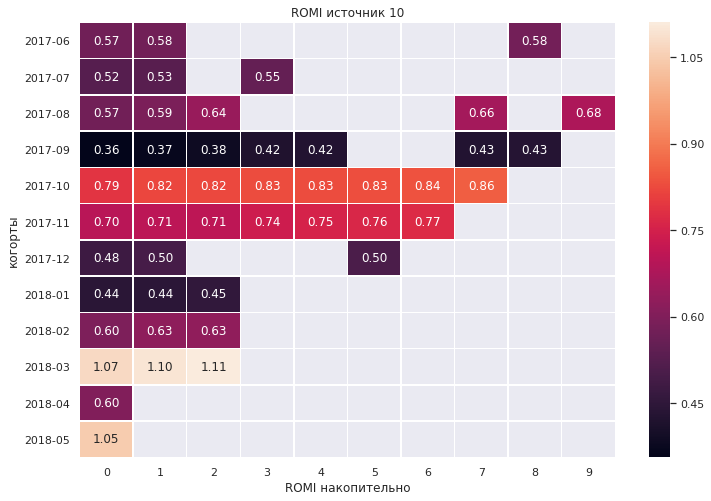

In [ ]:
# Тепловая карта окупаемости источника 10
romi_by_source(visits_orders_merged[visits_orders_merged['source_id'] == 10],
               costs_original[costs_original['source_id'] == 10],10)
plt.show()

**Неэффективный источник, вряд ли окупится вцелом, много коргот не покупают несколько месяцев подряд**

## Выводы и рекомендации

### Эффективность источников трафика 

<br>Источник №1 - Хорошая эффективность, большинство коргот окупились во втором месяце, не окупились корготы межсезнья с декабря по март. Невысокая средняя стоимость финансирования - можно увеличить бюджет

<br>Источник №2 - К концу периода окупилась половина коргот, расходы в средем в 2 раза выше чем на источник 1.

<br>Источник №3 - не эффективен, за период ни одна коргота не вышла на окупаемость, расходы самые большие. Первый кандидат на сокрашение бюджета, в виду самой высокой средней стоимости расходов и очень низкой окупаемости

<br>Источник №4 -слабая эффективность, окупились только июньская и ноябрьская корготы, темп покупаемость остальных - очень низкий.

<br>Источник №5 - слабая эффективность, окупаются только июнь, август, сентябрь, несмотря на увеличение финансирования во второй половине периода, более свежие корготы окупаются хуже.

<br>Источник №9 - окупились только летние корготы и сентябрь-октябрь, средняя стоимость финансирования невысокая, средняя 
окупаемость более полугода. Можно увеличить финансирование

<br>Источник №10 - окупились только мартовская и майская корготы, в целом переоценен, вряд ли окупится в разумные сроки. Необходимо перераспределить бюджет на этот источник в пользу более эффективных коргот.

<br> Источники №6,7,8 не имеют финансирования.

### Метрики

#### Продуктовые метрики

In [ ]:
product_metrics.style.format({'value' : "{:,.2f}"})

<br> MAU показал падение с сентября по феврал, потом восстановился, в целом рост слабый за пеиод
<br> Дельта между количеством сессий в день и количеством уникальных пользователей мала, трафик на сервис идет, однако люди достаточно редко возвращаются, средний Retention на второй месяц всего 6,52% и далее падает у всех коргот, в среднем пользователь редко когда заходит на сервис более 1 раза в день, проводит на сервисе чаще всего минуту. ВОзможно пользователи ищут что-то конкретное либо приходят по прямой ссылке. Нужны мероприятия по увеличению продолжительности пребывания пользователя на сайте, стимулирование повторных визитов.

#### Коммерческие метрики

In [ ]:
economic_metrics.style.format({'value' : "{:,.2f}"})

<br> Четверть клиентов делают заказы в пределах 9 минут с времени захода, однако половине пользователей требуется от 9 минут до 13 часов на совершение покупки, возможно сессии не завершаются автоматически при бездействии пользователя. В среднем за полгода пользователь совершает более 1.2 покупок со средним чеком 4.96 доллара, есть всплески по седнему чеку в предверии или во время популярных праздников и нового года. В среднем пользователь приносит около 8 долларов за полгода.
<br> Самая зарабатывающая коргота - сентябрьская, резко увеличивает выручку с четвертого месяца. Необходимо обратить внимание на январскую и февральскую когорты, далее они приносят деньги меньшими темпами чем весенние когорты.

#### Маркетинговые метрики

In [ ]:
marketing_metrics

metric          value
0                Сумма общих расходов  329131.620000
1                 Сумма общих доходов  252057.200000
0  Cредний CAC на одного покупателя $       9.815449

In [ ]:
print('Cредний СAC за 6 мес $', avg_cac_montly.iloc[0:6].mean())

Cредний СAC за 6 мес $ avg_cac    7.465221
dtype: float64


<br>Сумма расходов в периоде анализа превысила сумму выручки, средние расходы на привлечение пользователя составили 9.82 доллара. По абсолютным расходам лидеры - источник 2 и 3. Последний, абсолютно не эффективен по динамике окупаемости. Предлагаемые к увеличению расходов 1 и 9 источники имеют невысокую стоимость привлечения в расчете на покупателя. Источнику №2 тоже можно добавить бюджет, хотя средние расходы больше чем у 1 и 9.
<br> Cредний СAC за 6 мес. составил 7.45 долларов, средний LTV за этот период - 7.97 долларов, затраты на привлечение возможно окупать за 6 месяцев.

### Перспективные корготы

<br>Самые перспективные корготы клиентов которые растут в заработке для компании - стартовавшие во второй половине календарного года, особенно в сентябре, далее в июне и декабре.
<br> Сентябрьская коргота - лидер по быстроте окупаемости в пяти  источниках трафика. В среднем окупается от 1 до 3 месяцев, в целом летни и осенние корготы окупаются лучше.

**Общие рекомендации**
<br> Стимулирование увеличения retention и продолжительности сессии
<br> Cтимулирование увеличения среднего числа покупок, сокращение среднего времени от визита до покупки
<br> Перераспределение бюджета из источников №3 и №10 в пользу источника №1, №2, №9, для некоторых возможно продумать настройку бюджета учитывая лучшую окупаемость в конкретные периоды времени.